#### dataset analysis & visualization

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
eqtl_sign_path = '../datasets/eqtl_datasets/sign_prediction/'
tissue_list = ['Esophagus_Mucosa','Heart_Left_Ventricle','Nerve_Tibial']
size_list = ['small','middle','large']

new_data = pd.DataFrame()
for tissue in tissue_list:
    for size in size_list:
        eqtl_data = pd.read_pickle(eqtl_sign_path + tissue + '_' + size + '.dataset')
        for i in range(len(eqtl_data)):
            variant_id = eqtl_data['variant_id'][i]
            tss_distance = eqtl_data['tss_distance'][i]
            label = eqtl_data['label'][i]
            slope = eqtl_data['slope'][i]
            new_data = new_data._append({'variant_id':variant_id,'distance':tss_distance,'label':label,'slope':slope,
                                        'tissue':tissue,'size':size},ignore_index=True)

print(new_data.head())
new_data.to_csv('../datasets/eqtl_sign_merged.csv',index=False)

eqtl_slope_path = '../datasets/eqtl_datasets/slope_prediction/'
tissue_list = ['Esophagus_Mucosa','Heart_Left_Ventricle','Nerve_Tibial']
size_list = ['small','middle','large']

new_data = pd.DataFrame()
for tissue in tissue_list:
    for size in size_list:
        eqtl_data = pd.read_pickle(eqtl_slope_path + tissue + '_' + size + '.dataset')
        for i in range(len(eqtl_data)):
            variant_id = eqtl_data['variant_id'][i]
            tss_distance = eqtl_data['tss_distance'][i]
            slope = eqtl_data['slope'][i]
            new_data = new_data._append({'variant_id':variant_id,'distance':tss_distance,'slope':slope,
                                        'tissue':tissue,'size':size},ignore_index=True)

print(new_data.head())
new_data.to_csv('../datasets/eqtl_slope_merged.csv',index=False)

meqtl_slope_path = '../datasets/meqtl_datasets/slope_prediction/'
tissue_list = ['CD4','mono']
size_list = ['small']

new_data = pd.DataFrame()
for tissue in tissue_list:
    for size in size_list:
        eqtl_data = pd.read_pickle(meqtl_slope_path + tissue + '_' + size + '.dataset')
        for i in range(len(eqtl_data)):
            snp = eqtl_data['SNP'][i]
            cpg = eqtl_data['CpG'][i]
            tss_distance = np.abs(eqtl_data['SNP_POS'][i]-eqtl_data['CpG_POS'][i])
            beta = eqtl_data['Beta'][i]
            new_data = new_data._append({'snp':snp,'cpg':cpg,'distance':tss_distance,'beta':beta,
                                        'tissue':tissue},ignore_index=True)

print(new_data.head())
new_data.to_csv('../datasets/meqtl_slope_merged.csv',index=False)

              variant_id  distance  label     slope            tissue   size
0   chr1_1407232_G_C_b38       -81      1  0.291594  Esophagus_Mucosa  small
1   chr1_2493455_T_C_b38       197      1  0.487753  Esophagus_Mucosa  small
2  chr1_16889585_T_C_b38       490      1  0.884643  Esophagus_Mucosa  small
3  chr1_20508117_C_A_b38       -44      1  0.500833  Esophagus_Mucosa  small
4  chr1_22025454_G_T_b38       923      1  0.611722  Esophagus_Mucosa  small
              variant_id  distance     slope            tissue   size
0   chr1_1407232_G_C_b38       -81  0.291594  Esophagus_Mucosa  small
1   chr1_2493455_T_C_b38       197  0.487753  Esophagus_Mucosa  small
2  chr1_16889585_T_C_b38       490  0.884643  Esophagus_Mucosa  small
3  chr1_20508117_C_A_b38       -44  0.500833  Esophagus_Mucosa  small
4  chr1_22025454_G_T_b38       923  0.611722  Esophagus_Mucosa  small
               snp         cpg  distance      beta tissue
0   1:76251746_T_C  cg13250850      1012  1.731170    CD4
1 

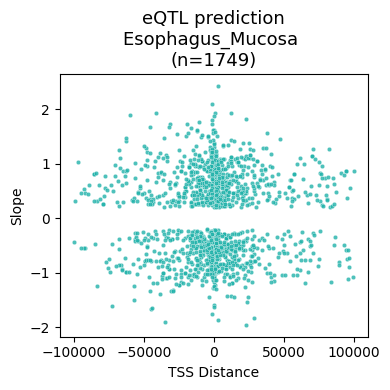

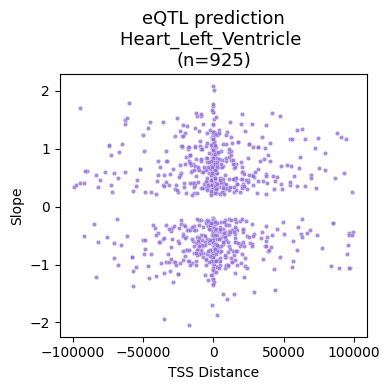

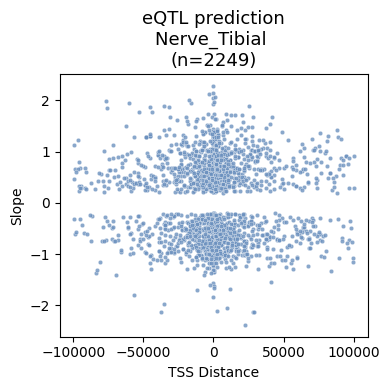

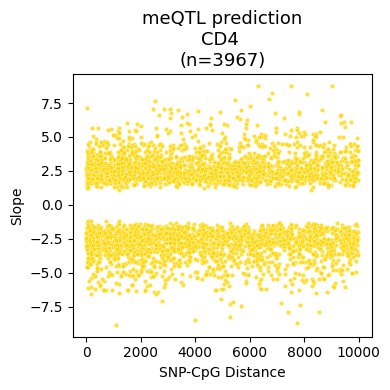

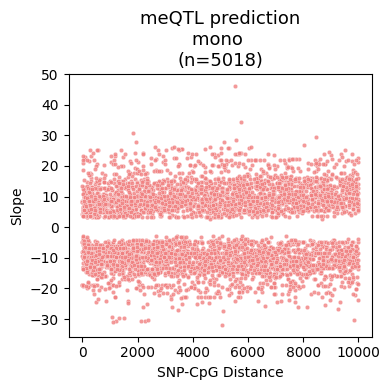

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('../datasets/eqtl_sign_merged.csv')
tissue_types = df['tissue'].unique()
morandi_palette = {
    'Esophagus_Mucosa': '#20B2AA',  
    'Heart_Left_Ventricle':'#9370DB',
    'Nerve_Tibial': '#6C91BF',       
}
fig, ax = plt.subplots(1, 1, figsize=(4, 4), sharey=True)
tissue = 'Esophagus_Mucosa'
subset = df[df['tissue'] == tissue]
sns.scatterplot(x='distance', y='slope', data=subset, ax=ax, s=10, color=morandi_palette[tissue], legend=False, alpha=0.8)
ax.set_title("eQTL prediction\n"+f'{tissue} \n(n={len(subset)})', fontsize=13)
ax.set_xlabel('TSS Distance')
ax.set_ylabel('Slope')
plt.tight_layout()
plt.savefig('images/eqtl-slope-tssdistance.png',dpi=300, bbox_inches = 'tight')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(4, 4), sharey=True)
tissue = 'Heart_Left_Ventricle'
subset = df[df['tissue'] == tissue]
sns.scatterplot(x='distance', y='slope', data=subset, ax=ax, s=10, color=morandi_palette[tissue], legend=False, alpha=0.8)
ax.set_title("eQTL prediction\n"+f'{tissue} \n(n={len(subset)})', fontsize=13)
ax.set_xlabel('TSS Distance')
ax.set_ylabel('Slope')
plt.tight_layout()
plt.savefig('images/eqtl-slope-tssdistance2.png',dpi=300, bbox_inches = 'tight')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(4, 4), sharey=True)
tissue = 'Nerve_Tibial'
subset = df[df['tissue'] == tissue]
sns.scatterplot(x='distance', y='slope', data=subset, ax=ax, s=10, color=morandi_palette[tissue], legend=False, alpha=0.8)
ax.set_title("eQTL prediction\n"+f'{tissue} \n(n={len(subset)})', fontsize=13)
ax.set_xlabel('TSS Distance')
ax.set_ylabel('Slope')
plt.tight_layout()
plt.savefig('images/eqtl-slope-tssdistance3.png',dpi=300, bbox_inches = 'tight')
plt.show()

df = pd.read_csv('../datasets/meqtl_slope_merged.csv')
tissue_types = df['tissue'].unique()
morandi_palette = {
    'CD4': '#FFD700',  
    'mono':'#F08080',     
}

fig, ax = plt.subplots(1, 1, figsize=(4, 4), sharey=True)
tissue = 'CD4'
subset = df[df['tissue'] == tissue]
sns.scatterplot(x='distance', y='beta', data=subset, ax=ax, s=10, color=morandi_palette[tissue], legend=False, alpha=0.8)
ax.set_title("meQTL prediction\n"+f'{tissue} \n(n={len(subset)})', fontsize=13)
ax.set_xlabel('SNP-CpG Distance')
ax.set_ylabel('Slope')
plt.tight_layout()
plt.savefig('images/meqtl-slope-tssdistance.png',dpi=300, bbox_inches = 'tight')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(4, 4), sharey=True)
tissue = 'mono'
subset = df[df['tissue'] == tissue]
sns.scatterplot(x='distance', y='beta', data=subset, ax=ax, s=10, color=morandi_palette[tissue], legend=False, alpha=0.8)
ax.set_title("meQTL prediction\n"+f'{tissue} \n(n={len(subset)})', fontsize=13)
ax.set_xlabel('SNP-CpG Distance')
ax.set_ylabel('Slope')
plt.tight_layout()
plt.savefig('images/meqtl-slope-tssdistance2.png',dpi=300, bbox_inches = 'tight')
plt.show()

<Figure size 1000x600 with 0 Axes>

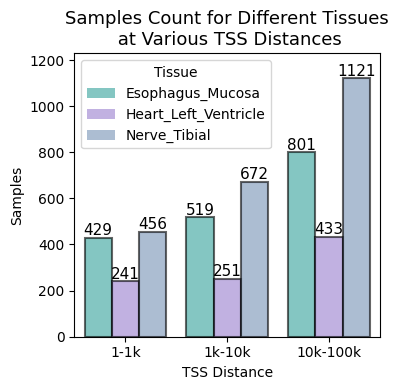

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

data = pd.read_csv('../datasets/dataset_analysis.csv')
custom_colors = ['#20B2AA', '#9370DB', '#6C91BF']

plt.figure(figsize=(4, 4))
ax = sns.barplot(x='TSS distance', y='Samples', hue='Tissue', data=data, palette=custom_colors,alpha=0.6)

# Add black borders to each bar
for p in ax.patches:
    p.set_edgecolor('black')  # Add black border to the bars
    p.set_linewidth(1.5)  # Set the width of the border

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=11, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xlabel('TSS Distance')
plt.ylabel('Samples')
plt.title('Samples Count for Different Tissues\n at Various TSS Distances', fontsize=13)
ax.set_ylim(0, 1230)

#plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('images/eqtl-count.png',dpi=300, bbox_inches = 'tight')
plt.show()

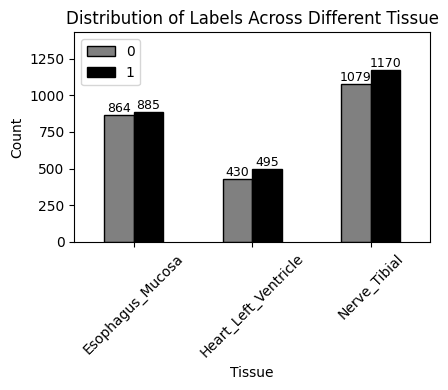

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_updated = pd.read_csv('../datasets/eqtl_sign_merged.csv')

custom_colors = ['#808080', '#000000']

# Group by tissue and label
grouped_updated = df_updated.groupby(["tissue", "label"]).size().unstack(fill_value=0)

ax_updated = grouped_updated.plot(
    kind="bar", 
    figsize=(4.5, 4), 
    color=custom_colors, 
    edgecolor="black"
)

# Adding values on top of the bars
for container in ax_updated.containers:
    ax_updated.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

# Customize the title, labels, and legend
plt.title("Distribution of Labels Across Different Tissue")
plt.xlabel("Tissue")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Label", loc="upper right")
plt.xlim(-0.5, 2.5)
plt.ylim(0, 1430)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('images/eqtl-count2.png',dpi=300, bbox_inches = 'tight')
# Show the enhanced plot
plt.show()
